<a href="https://colab.research.google.com/github/jamile-kellensouza/A-machine-learning-workflow-for-biomedical-tabular-data/blob/main/Exploratory_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import spearmanr, pearsonr, pointbiserialr

In [ ]:
# Dataset visualization
data = pd.read_csv('/content/alzheimers_disease_data.csv')
display(data.head())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
#Filtering of the PatieniID and DoctoInCharge features and observation of the descriptive statistics of the dataset.
data_fil = data.drop(columns=['PatientID', 'DoctorInCharge'])
summary = data_fil.describe().T
print(summary)

                            count        mean         std         min  \
Age                        2149.0   74.908795    8.990221   60.000000   
Gender                     2149.0    0.506282    0.500077    0.000000   
Ethnicity                  2149.0    0.697534    0.996128    0.000000   
EducationLevel             2149.0    1.286645    0.904527    0.000000   
BMI                        2149.0   27.655697    7.217438   15.008851   
Smoking                    2149.0    0.288506    0.453173    0.000000   
AlcoholConsumption         2149.0   10.039442    5.757910    0.002003   
PhysicalActivity           2149.0    4.920202    2.857191    0.003616   
DietQuality                2149.0    4.993138    2.909055    0.009385   
SleepQuality               2149.0    7.051081    1.763573    4.002629   
FamilyHistoryAlzheimers    2149.0    0.252210    0.434382    0.000000   
CardiovascularDisease      2149.0    0.144253    0.351428    0.000000   
Diabetes                   2149.0    0.150768    0.

In [ ]:
# Separation of features into binary, categorical, and numerical forms.
binary = []
categorical = ['Ethnicity','EducationLevel']
numeric = []


for c in data_fil.columns:
  if data_fil[c].nunique() == 2:
    binary.append(c)
  if c != 'Diagnosis':
    if c not in (binary + categorical):
      numeric.append(c)

print(binary)
print(categorical)
print(numeric)

['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
['Ethnicity', 'EducationLevel']
['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


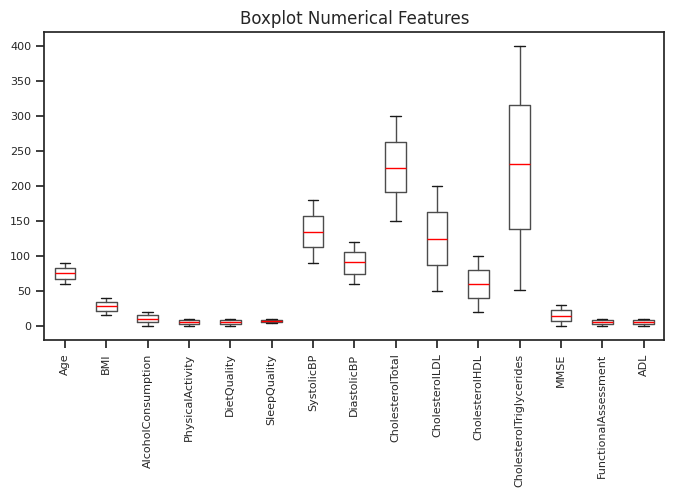

In [ ]:
#Boxplot das numerical features (Fig2)
features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL']

plt.figure(figsize=(8,4))
data_fil[features].boxplot(medianprops=dict(color="red"))
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=8)
plt.title("Boxplot Numerical Features")
plt.grid(False)
plt.show()

In [ ]:
# Pairplot Numerical Features (Fig3)

col = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Adding the class to the filtered dataset
cols_with_class = col + ['Diagnosis']

# Graph
sns.set(style="ticks")
pairgrid = sns.pairplot(data_fil[cols_with_class],
                        hue='Diagnosis',
                        palette={0 : 'purple', 1 : 'yellow'},
                        diag_kind='hist',
                        diag_kws={'alpha': 0.5},
                        plot_kws={'alpha':0.7, 's':30},
                        height=2.5)

plt.suptitle("Pairplot Numerical Features X Diagnosis", y=1)
plt.show()

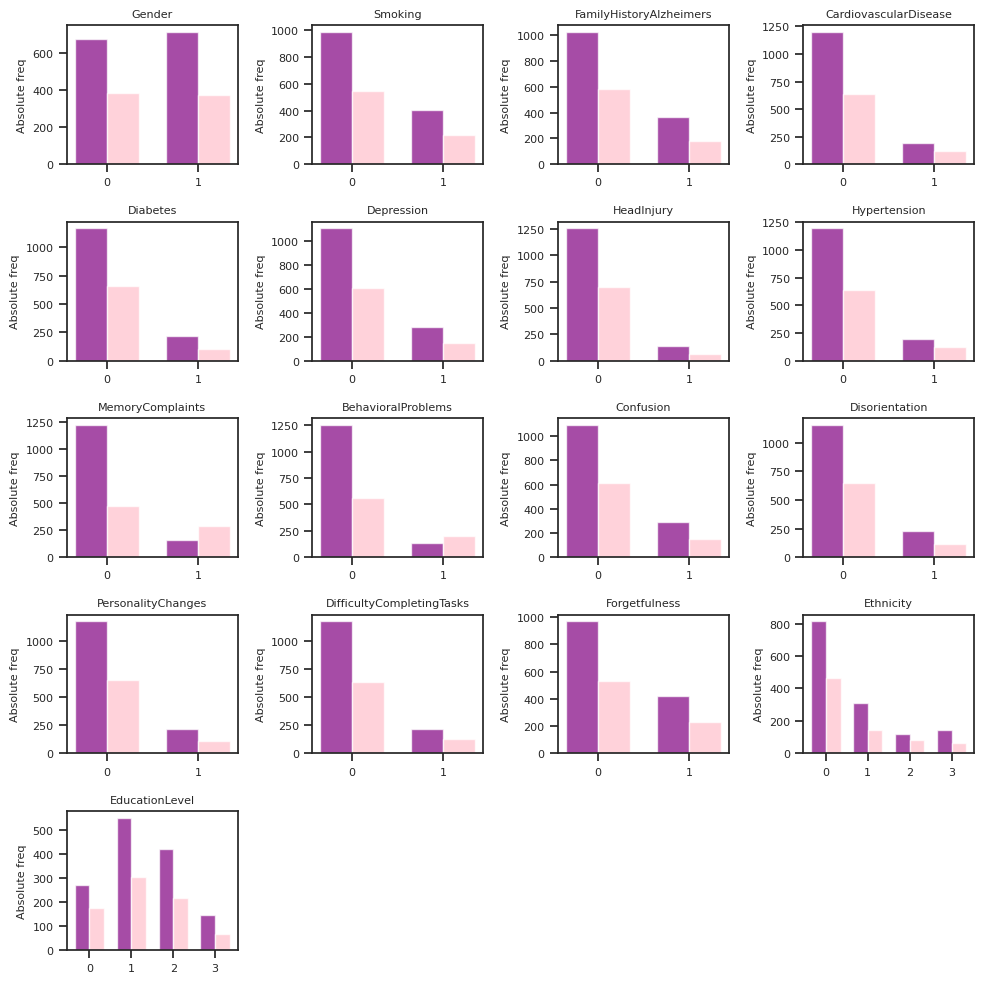

In [ ]:
# Bar chart of binary and numerical features (absolute frequencies) (Fig4)

cols_to_plot = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
        'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
        'DifficultyCompletingTasks', 'Forgetfulness', 'Ethnicity', 'EducationLevel']

ncols = 4
nrows = int(np.ceil(len(cols_to_plot) / ncols))
subset_positive = data_fil[data_fil['Diagnosis'] == 1] # No Alzheimer
subset_negative = data_fil[data_fil['Diagnosis'] == 0] # Yes Alzheimer


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):

    # Count for each subset
    counts_neg = subset_negative[col].value_counts().sort_index()
    counts_pos = subset_positive[col].value_counts().sort_index()

    # Ensure that both have the same categories
    categories = sorted(set(counts_neg.index).union(set(counts_pos.index)))
    counts_neg = counts_neg.reindex(categories, fill_value=0)
    counts_pos = counts_pos.reindex(categories, fill_value=0)

    # Positions of the bars
    x = np.arange(len(categories))
    width = 0.35

    # Plot
    axes[i].bar(x - width/2, counts_neg, width, label="Subset 0", color="purple", alpha=0.7)
    axes[i].bar(x + width/2, counts_pos, width, label="Subset 1", color="pink", alpha=0.7)

    axes[i].set_title(col)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(categories)
    axes[i].set_ylabel("Absolute freq", fontsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].set_title(col, fontsize=8)

# Remove any extra axles if there are any left over
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#(Fig5) Correlation Analysis

features = ['MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems']
df = data_fil[features]

# Identifying binary (0 and 1) and continuous variables
binary_vars = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
continuous_vars = [col for col in df.columns if col not in binary_vars]

print("Variáveis binárias:", binary_vars)
print("Variáveis contínuas:", continuous_vars)

# Correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

# Correlation calculation
for i in df.columns:
    for j in df.columns:
        if i == j:
            corr_matrix.loc[i, j] = 1.0
        else:
            x, y = df[i], df[j]
            if i in binary_vars and j in binary_vars:
                corr, _ = pearsonr(x, y)
            elif i in continuous_vars and j in continuous_vars:
                corr, _ = pearsonr(x, y)
            else:
                corr, _ = pointbiserialr(x, y)
            corr_matrix.loc[i, j] = corr

# Heatmap
plt.figure(figsize=(7, 5))
ax = sns.heatmap(corr_matrix.astype(float), annot=True, cmap='magma', vmin=-1, vmax=1,annot_kws={"size": 8},cbar_kws={"shrink": 0.9})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7)
plt.title("Heatmap of correlation of selected features", fontsize=9)


plt.show()


In [ ]:
esp_amostral = data_fil['Diagnosis'].unique()
print(f'Output: {esp_amostral}')
print(f'Number outputs: {len(esp_amostral)}')

Output: [0 1]
Number outputs: 2


In [ ]:
# Total de samples do dataset
total = len(data_fil)
print(f'Samples total: {total}')

subset_positive = data_fil[data_fil['Diagnosis'] == 1] # Yes Alzheimer
subset_negative = data_fil[data_fil['Diagnosis'] == 0] # No Alzheimer

# Total number of samples in each class
total_1 = len(subset_positive)
total_0 = len(subset_negative)

# Prior probability for each class
prop_1 = total_1/total
print(f"The probability of receiving a positive diagnosis for Alzheimer's is:{prop_1:.3f}")

prop_0 = total_0/total
print(f"The probability of having a negative diagnosis for Alzheimer's is: {prop_0:.3f}")

print(f'Yes Alzheimer: {total_1}')
print(f'No Alzheimer: {total_0}')

Samples total: 2149
The probability of receiving a positive diagnosis for Alzheimer's is:0.354
The probability of having a negative diagnosis for Alzheimer's is: 0.646
Yes Alzheimer: 760
No Alzheimer: 1389


In [ ]:
#Event A -> What is the probability that the MMSE score will be less than 22?
EventA = (data_fil['MMSE'] < 22).sum()/total
print(f'The probability of event A occurring is: {EventA:.4f}')

The probability of event A occurring is: 0.7403


In [ ]:
#Event B -> What is the probability of memory problems occurring?

EventB = (data_fil['MemoryComplaints'] == 1).sum()/total
print(f'The probability of event B occurring is: {EventB:.4f}')

The probability of event B occurring is: 0.2080


In [ ]:
#Event C -> What is the probability that the Functional Assessment will be less than 6?

EventC = (data_fil['FunctionalAssessment'] < 6).sum()/total
print(f'The probability of event C occurring is: {EventC:.4f}')

The probability of event C occurring is: 0.5900


In [ ]:
#Event D -> What is the probability that the ADL score will be greater than 7?

EventD = (data_fil['ADL'] > 7).sum()/total
print(f'The probability of event D occurring is: {EventD:.4f}')

The probability of event D occurring is: 0.3155


In [ ]:
#Event E -> What is the probability of Behavioral Problems occurring?

EventoE = (data_fil['BehavioralProblems'] == 1).sum()/total
print(f'The probability of event E occurring is {EventoE:.4f}')

The probability of event E occurring is 0.1568


In [ ]:
# Merging event B and event E
EventoF1 = (data_fil['MemoryComplaints'] == 1).sum()/total

EventoF2 = (data_fil['BehavioralProblems'] == 1).sum()/total

EventoF3 = ((data_fil['MemoryComplaints'] == 1) & (data_fil['BehavioralProblems'] == 1)).sum()/total

EventoF = EventoF1 + EventoF2 - EventoF3
print(f'The probability of event F occurring is: {EventoF:.4f}')


The probability of event F occurring is: 0.3336


In [ ]:
EventoG1 = (data_fil['MMSE'] > 22).sum()/total

EventoG2 = (data_fil['FunctionalAssessment'] >= 5).sum()/total

EventoG3 = ((data_fil['MMSE'] > 22) & (data_fil['FunctionalAssessment'] >= 5)).sum()/total

EventoG = EventoG1 + EventoG2 - EventoG3
print(f'The probability of event G occurring is: {EventoG:.4f}')

The probability of event G occurring is: 0.6329


In [ ]:
EventoH1 = (data_fil['MemoryComplaints'] == 1).sum()/total

EventoH2 = (data_fil['FunctionalAssessment'] >= 5).sum()/total

EventoH3 = ((data_fil['MemoryComplaints'] == 1) & (data_fil['FunctionalAssessment'] >= 5)).sum()/total

EventoH = EventoH1 + EventoH2 - EventoH3
print(f'The probability of event H occurring is: {EventoH:.4f}')

The probability of event H occurring is: 0.6142


In [ ]:
# Intersection: Functional assessment >=5 and no occurrence of behavioral problems
EventoI = ((data_fil['FunctionalAssessment'] >= 5) & (data_fil['BehavioralProblems'] == 0)).sum()/total
print(f'The probability of event I occurring is: {EventoI:.4f}')

The probability of event I occurring is: 0.4323


In [ ]:
EventoJ = ((data_fil['MMSE'] <= 22) & (data_fil['MemoryComplaints'] == 1)).sum()/total
print(f'The probability of event I occurring is: {EventoJ:.4f}')

The probability of event I occurring is: 0.1540


In [ ]:
# What is the probability that the MMSE score is <= 22 given that the patient has been diagnosed with Alzheimer's disease (EVENT B)?
Evento_B = len(subset_positive)/total

Evento_AB = ((data_fil['MMSE'] <= 22) & (data_fil['Diagnosis'] == 1)).sum()/total

PropAB = Evento_AB/Evento_B


# Pandas option
PropAB = (data_fil.query('Diagnosis == 1')['MMSE']<=22).mean()
print(f'The probability of event occurring is: {PropAB:.4f}')

The probability of event occurring is: 0.9013


In [ ]:
# What is the likelihood of memory complaints occurring given that the patient has NOT been diagnosed with Alzheimer's?
Evento_B = len(subset_negative)/total
Evento_AB = ((data_fil['MemoryComplaints'] == 1) & (data_fil['Diagnosis'] == 0)).sum()/total


PropAB = Evento_AB/Evento_B
print(f'The probability of event occurring is: {PropAB:.4f}')


The probability of event occurring is: 0.1159


In [ ]:
# What is the likelihood of behavioral problems occurring given that the patient has been diagnosed with Alzheimer's disease (EVENT B)?
Evento_B = len(subset_positive)/total
Evento_AB = ((data_fil['BehavioralProblems'] == 1) & (data_fil['Diagnosis'] == 1)).sum()/total


PropAB = Evento_AB/Evento_B
print(f'The probability of event occurring is: {PropAB:.4f}')


The probability of event occurring is: 0.2671


In [ ]:
# What is the probability of a FunctionalAssessment score >= 5 given that the patient was NOT diagnosed with Alzheimer's (EVENT B)?
Evento_B = len(subset_negative)/total
Evento_AB = ((data_fil['FunctionalAssessment'] >= 5) & (data_fil['Diagnosis'] == 0)).sum()/total


PropAB = Evento_AB/Evento_B
print(f'The probability of event occurring is: {PropAB:.4f}')


The probability of event occurring is: 0.6616


Discretization of numerical features and construction of PDF curve graphs and probability a posteriori (Bayes)

Fig5

In [ ]:
# Class 0 - No Alzheimer
# ----------------------------
counts0, bins0 = np.histogram(subset_negative['FunctionalAssessment'], bins= 6)
bin_widths0 = np.diff(bins0)
mids0 = 0.5 * (bins0[1:] + bins0[:-1])

n0 = len(subset_negative['FunctionalAssessment'])
density0 = counts0 / (n0 * bin_widths0)

# ----------------------------
# Class 1 - Yes Alzheimer
# ----------------------------
counts1, bins1 = np.histogram(subset_positive['FunctionalAssessment'], bins= 6)
bin_widths1 = np.diff(bins1)
mids1 = 0.5 * (bins1[1:] + bins1[:-1])

n1 = len(subset_positive['FunctionalAssessment'])
density1 = counts1 / (n1 * bin_widths1)

# ----------------------------
# Histogram
# ----------------------------
plt.subplot(1, 2, 1)
plt.hist(subset_negative['FunctionalAssessment'], bins= 6, density=True, edgecolor="black", color='violet')
plt.xlabel('FunctionalAssessment')
plt.ylabel("Density")
plt.title("Histogram - No Alzheimer")

plt.subplot(1, 2, 2)
plt.hist(subset_positive['FunctionalAssessment'], bins= 6, density=True, edgecolor="black", color='violet')
plt.xlabel('FunctionalAssessment')
plt.ylabel("Density")
plt.title("Histogram - Yes Alzheimer")

plt.tight_layout()
plt.show()

# ----------------------------
# Graph of discrete conditional distributions
# ----------------------------
plt.figure(figsize=(7,5))
plt.plot(mids0, density0, '-o', color="purple", label="No Alzheimer")
plt.plot(mids1, density1, '-o', color="hotpink", label="Yes Alzheimer")

plt.axvline(x=5, color="orange", linewidth=3, label="Limit")

plt.xlabel("FunctionalAssessment")
plt.ylabel("p(x|w)")
plt.title("Probability Density Function - FunctionalAssessment")
plt.legend()
plt.grid(True)
plt.show()


Breaks: [0.01469122 1.26282321 2.5109552  3.75908718 5.00721917 6.25535116
 7.50348315 8.75161513 9.99974712]
Counts: [134 126 113 125 211 226 222 232]
Mids: [0.63875722 1.8868892  3.13502119 4.38315318 5.63128517 6.87941715
 8.12754914 9.37568113]
Density: [0.07729333 0.07267881 0.0651802  0.07210199 0.12170816 0.1303604
 0.12805313 0.13382129] 

Breaks: [1.28792770e-03 1.24425648e+00 2.48722504e+00 3.73019360e+00
 4.97316215e+00 6.21613071e+00 7.45909927e+00 8.70206782e+00
 9.94503638e+00]
Counts: [167 141 123 134  49  41  55  50]
Mids: [0.62277221 1.86574076 3.10870932 4.35167788 5.59464643 6.83761499
 8.08058355 9.3235521 ]
Density: [0.17678391 0.14926067 0.13020611 0.14185056 0.05187073 0.04340204
 0.05822225 0.05292931]


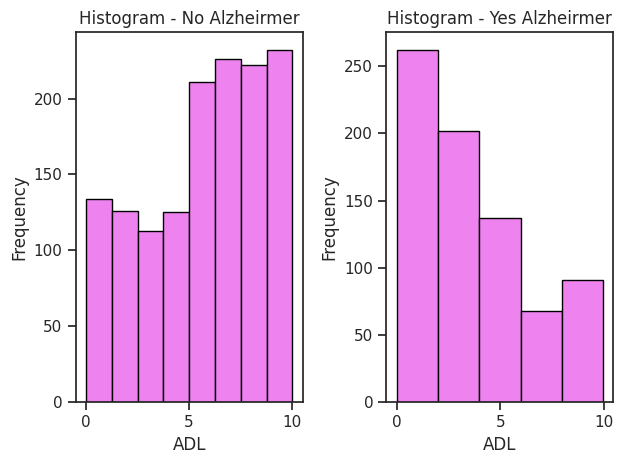

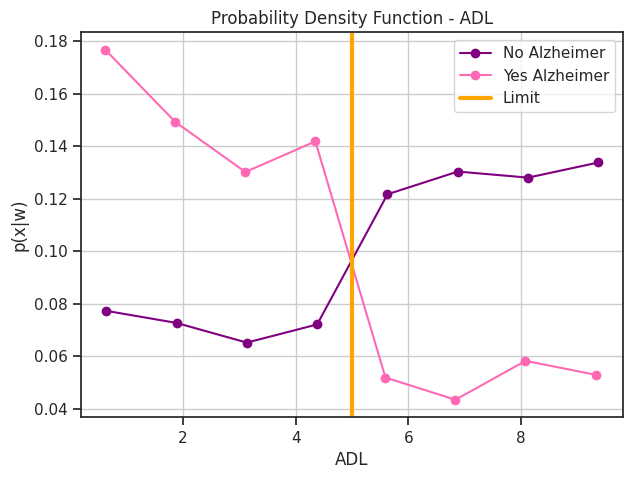

In [ ]:
# class 0 - No alzheirmer
counts0, bins0 = np.histogram(subset_negative["ADL"], bins= 8)
bin_widths0 = np.diff(bins0)
mids0 = 0.5 * (bins0[1:] + bins0[:-1])

#density calculation
n0 = len(subset_negative["ADL"])
density0 = counts0 / (n0 * bin_widths0)

print("Breaks:", bins0)
print("Counts:", counts0)
print("Mids:", mids0)
print("Density:", density0,'\n')

### class 1 - Yes alzheirmer
counts1, bins1 = np.histogram(subset_positive["ADL"], bins= 8)
bin_widths1 = np.diff(bins1)
mids1 = 0.5 * (bins1[1:] + bins1[:-1])

# density calculation
n1 = len(subset_positive["ADL"])
density1 = counts1 / (n1 * bin_widths1)

print("Breaks:", bins1)
print("Counts:", counts1)
print("Mids:", mids1)
print("Density:", density1)

# graph
plt.subplot(1, 2, 1)
plt.hist(subset_negative["ADL"], bins= 8, edgecolor="black", color = 'violet')
plt.xlabel("ADL")
plt.ylabel("Frequency")
plt.title("Histogram - No Alzheirmer")


plt.subplot(1, 2, 2)
plt.hist(subset_positive["ADL"], bins= 5, edgecolor="black", color ='violet')
plt.xlabel("ADL")
plt.ylabel("Frequency")
plt.title("Histogram - Yes Alzheirmer")

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(mids0, density0, '-o', color="purple", label="No Alzheimer")
plt.plot(mids1, density1, '-o', color="hotpink", label="Yes Alzheimer")

plt.axvline(x=5, color="orange", linewidth=3, label="Limit")

plt.xlabel("ADL")
plt.ylabel("p(x|w)")
plt.title("Probability Density Function - ADL")
plt.legend()
plt.grid(True)
plt.show()


Breaks: [5.31214644e-03 2.50415118e+00 5.00299022e+00 7.50182925e+00
 1.00006683e+01 1.24995073e+01 1.49983464e+01 1.74971854e+01
 1.99960244e+01 2.24948635e+01 2.49937025e+01 2.74925415e+01
 2.99913806e+01]
Counts: [101  97 114 104 114  88  85 115 116 131 168 156]
Mids: [ 1.25473166  3.7535707   6.25240973  8.75124877 11.2500878  13.74892684
 16.24776587 18.74660491 21.24544394 23.74428297 26.24312201 28.74196104]
Density: [0.02909919 0.02794674 0.03284463 0.02996352 0.03284463 0.02535375
 0.02448941 0.03313274 0.03342085 0.03774251 0.04840261 0.04494528] 

Breaks: [ 0.05062351  2.54302362  5.03542373  7.52782383 10.02022394 12.51262405
 15.00502416 17.49742426 19.98982437 22.48222448 24.97462458 27.46702469
 29.9594248 ]
Counts: [82 77 92 81 81 81 55 71 78 44 10  8]
Mids: [ 1.29682357  3.78922367  6.28162378  8.77402389 11.26642399 13.7588241
 16.25122421 18.74362432 21.23602442 23.72842453 26.22082464 28.71322474]
Density: [0.04328949 0.04064989 0.0485687  0.04276157 0.04276157 0.04

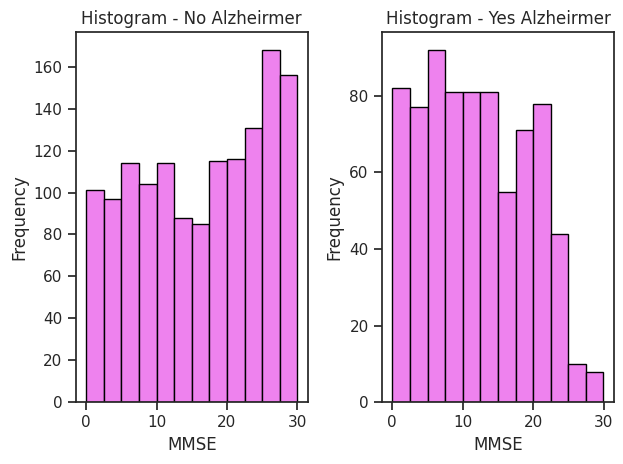

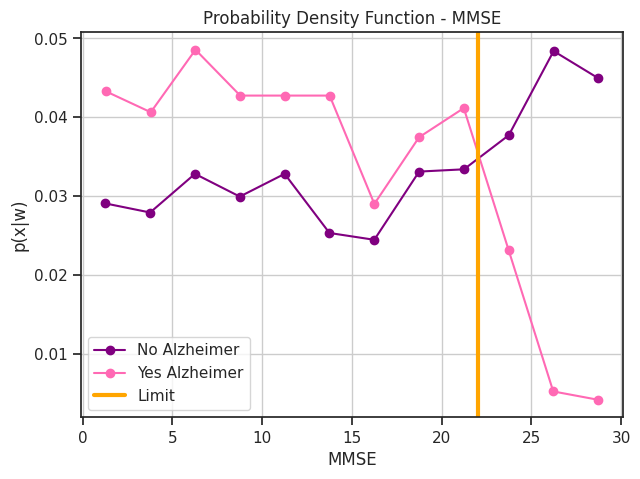

In [ ]:
### class 0 - No alzheirmer
counts0, bins0 = np.histogram(subset_negative["MMSE"], bins= 'auto')
bin_widths0 = np.diff(bins0)
mids0 = 0.5 * (bins0[1:] + bins0[:-1])

# density calculation
n0 = len(subset_negative["MMSE"])
density0 = counts0 / (n0 * bin_widths0)

print("Breaks:", bins0)
print("Counts:", counts0)
print("Mids:", mids0)
print("Density:", density0,'\n')

### class 1 - Yes alzheirmer
counts1, bins1 = np.histogram(subset_positive["MMSE"], bins= 'auto')
bin_widths1 = np.diff(bins1)
mids1 = 0.5 * (bins1[1:] + bins1[:-1])

# density calculation
n1 = len(subset_positive["MMSE"])
density1 = counts1 / (n1 * bin_widths1)

print("Breaks:", bins1)
print("Counts:", counts1)
print("Mids:", mids1)
print("Density:", density1)

# gráfico
plt.subplot(1, 2, 1)
plt.hist(subset_negative["MMSE"], bins= "auto" , edgecolor="black", color = 'violet')
plt.xlabel("MMSE")
plt.ylabel("Frequency")
plt.title("Histogram - No Alzheirmer")


plt.subplot(1, 2, 2)
plt.hist(subset_positive["MMSE"], bins= "auto" , edgecolor="black", color ='violet')
plt.xlabel("MMSE")
plt.ylabel("Frequency")
plt.title("Histogram - Yes Alzheirmer")

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(mids0, density0, '-o', color="purple", label="No Alzheimer")
plt.plot(mids1, density1, '-o', color="hotpink", label="Yes Alzheimer")

plt.axvline(x=22, color="orange", linewidth=3, label="Limit")

plt.xlabel("MMSE")
plt.ylabel("p(x|w)")
plt.title("Probability Density Function - MMSE")
plt.legend()
plt.grid(True)
plt.show()



Fig6

In [ ]:
# data
x_class0 = subset_negative['FunctionalAssessment'].values
x_class1 = subset_positive['FunctionalAssessment'].values

# Prior probabilities
P0 = len(x_class0) / (len(x_class0) + len(x_class1))
P1 = len(x_class1) / (len(x_class0) + len(x_class1))

kde0 = gaussian_kde(x_class0)
kde1 = gaussian_kde(x_class1)

x_values = np.linspace(min(min(x_class0), min(x_class1)),
                       max(max(x_class0), max(x_class1)), 500)

Px_w0 = kde0(x_values)
Px_w1 = kde1(x_values)

Px = Px_w0 * P0 + Px_w1 * P1
Pw0_x = (Px_w0 * P0) / Px
Pw1_x = (Px_w1 * P1) / Px

plt.figure(figsize=(7,5))
plt.plot(x_values, Pw0_x, label='P(w0|x)', color='purple', lw=2)
plt.plot(x_values, Pw1_x, label='P(w1|x)', color='hotpink', lw=2)

decision_idx = np.argmin(np.abs(Pw0_x - Pw1_x))
decision_boundary = x_values[decision_idx]
plt.axvline(decision_boundary, color='orange', linestyle='--', label='Decision')

plt.xlabel('FunctionalAssessment')
plt.ylabel('Prior probabilities')
plt.title('Bayes Theorem - FunctionalAssessment')
plt.legend()
plt.grid(True)
plt.show()

print(f"Decision limit (Bayes) for FunctionalAssessment: x = {decision_boundary:.2f}")

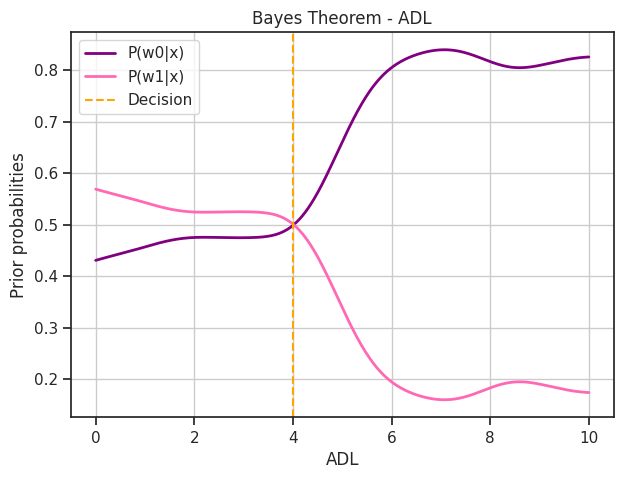

Limite de decisão (Bayes) para ADL': x= 4.01


In [ ]:
# Data
x_class0 = subset_negative['ADL'].values
x_class1 = subset_positive['ADL'].values

# Prior probabilities
P0 = len(x_class0) / (len(x_class0) + len(x_class1))
P1 = len(x_class1) / (len(x_class0) + len(x_class1))

kde0 = gaussian_kde(x_class0)
kde1 = gaussian_kde(x_class1)

x_values = np.linspace(min(min(x_class0), min(x_class1)),
                       max(max(x_class0), max(x_class1)), 500)

Px_w0 = kde0(x_values)
Px_w1 = kde1(x_values)

Px = Px_w0 * P0 + Px_w1 * P1
Pw0_x = (Px_w0 * P0) / Px
Pw1_x = (Px_w1 * P1) / Px

plt.figure(figsize=(7,5))
plt.plot(x_values, Pw0_x, label='P(w0|x)', color='purple', lw=2)
plt.plot(x_values, Pw1_x, label='P(w1|x)', color='hotpink', lw=2)

decision_idx = np.argmin(np.abs(Pw0_x - Pw1_x))
decision_boundary = x_values[decision_idx]
plt.axvline(decision_boundary, color='orange', linestyle='--', label='Decision')

plt.xlabel('ADL')
plt.ylabel('Prior probabilities')
plt.title('Bayes Theorem - ADL')
plt.legend()
plt.grid(True)
plt.show()

print(f"Limite de decisão (Bayes) para ADL': x= {decision_boundary:.2f}")


In [ ]:
# Data
x_class0 = subset_negative['MMSE'].values
x_class1 = subset_positive['MMSE'].values

# Prior probabilities
P0 = len(x_class0) / (len(x_class0) + len(x_class1))
P1 = len(x_class1) / (len(x_class0) + len(x_class1))

kde0 = gaussian_kde(x_class0)
kde1 = gaussian_kde(x_class1)

x_values = np.linspace(min(min(x_class0), min(x_class1)),
                       max(max(x_class0), max(x_class1)), 500)

Px_w0 = kde0(x_values)
Px_w1 = kde1(x_values)

Px = Px_w0 * P0 + Px_w1 * P1
Pw0_x = (Px_w0 * P0) / Px
Pw1_x = (Px_w1 * P1) / Px

plt.figure(figsize=(7,5))
plt.plot(x_values, Pw0_x, label='P(w0|x)', color='purple', lw=2)
plt.plot(x_values, Pw1_x, label='P(w1|x)', color='hotpink', lw=2)

decision_idx = np.argmin(np.abs(Pw0_x - Pw1_x))
decision_boundary = x_values[decision_idx]
plt.axvline(decision_boundary, color='orange', linestyle='--', label='Decision')

plt.xlabel('MMSE')
plt.ylabel('Prior probabilities')
plt.title('Bayes Theorem - MMSE')
plt.legend()
plt.grid(True)
plt.show()

print(f"Limite de decisão (Bayes) para MMSE': x = {decision_boundary:.2f}")